## Data Filtering

- based on the shape measurements the data shall be filtered
- filtering based on shape to still calculate size parameters afterwards properly

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append("../../../../../01_python_definitions")
from fluorescent_microscopy_analysis import correlation_matrix

In [2]:
path = "../measurements/wt-postnatal-development/"

In [3]:
measurements = pd.read_csv(path + "05-a-measurements-inf-reduced.csv")
measurements

,label,age,biol_repl,image_id,maximum,mean,median,minimum,sigma,sum,...,equivalent_spherical_perimeter_rescaled,equivalent_spherical_radius_rescaled,feret_diameter_rescaled,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled
0,1,8,1,0,803.0,314.092437,282.884766,186.0,99.098496,261639.0,...,138.287624,1.885333,8.107236,18.460443,8.872033,2.037236,85.604886,116.461211,51.389857,28.070656
1,2,8,1,0,1845.0,620.114058,466.576172,174.0,407.194822,467566.0,...,129.399980,1.823742,6.111447,8.976538,3.444867,2.044837,43.541779,42.257627,29.149001,25.408493
2,3,8,1,0,564.0,274.831858,253.494141,154.0,91.856545,62112.0,...,57.955182,1.220513,3.995289,6.273068,2.549953,1.312964,21.829812,14.018479,9.233325,7.615808
3,4,8,1,0,540.0,285.008439,268.189453,153.0,89.769054,67547.0,...,59.820799,1.240002,4.669557,6.273068,2.766553,1.117553,23.752687,16.175168,9.570308,7.986489
4,5,8,1,0,264.0,234.200000,238.798828,202.0,20.192821,5855.0,...,13.355085,0.585895,2.261000,2.777771,1.010003,0.745937,8.389508,2.426275,1.112043,0.842457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,173,24,28,83,312.0,243.290323,245.492188,179.0,26.596939,60336.0,...,61.657763,1.258897,5.297594,9.737588,4.460800,1.451807,40.056207,46.705798,12.805341,8.357170
16696,174,24,28,83,685.0,346.677288,326.101562,187.0,92.460071,424333.0,...,178.734172,2.143385,8.551879,30.066147,8.226779,5.176775,131.982553,226.856733,104.262438,41.246679
16697,175,24,28,83,609.0,337.340530,326.101562,188.0,81.507414,343750.0,...,158.174366,2.016343,8.478365,21.955740,9.303697,3.873424,102.052789,176.915902,74.136187,34.338534
16698,176,24,28,83,347.0,255.431818,252.820312,193.0,37.513655,11239.0,...,19.468019,0.707387,1.910894,4.002664,1.622372,0.810159,7.356350,3.032844,1.819706,1.482724


In [4]:
measurements.keys()

Index(['label', 'age', 'biol_repl', 'image_id', 'maximum', 'mean', 'median',
       'minimum', 'sigma', 'sum', 'variance', 'flatness', 'elongation',
       'sphericity', 'solidity', 'bbox_3_rescaled', 'bbox_4_rescaled',
       'bbox_5_rescaled', 'equivalent_ellipsoid_diameter_0_rescaled',
       'equivalent_ellipsoid_diameter_1_rescaled',
       'equivalent_ellipsoid_diameter_2_rescaled',
       'equivalent_spherical_perimeter_rescaled',
       'equivalent_spherical_radius_rescaled', 'feret_diameter_rescaled',
       'perimeter_2d_rescaled', 'major_axis_length_2d_rescaled',
       'minor_axis_length_2d_rescaled', 'surface_area_rescaled',
       'bbox_volume_rescaled', 'convex_volume_rescaled', 'volume_rescaled'],
      dtype='object')

In [5]:
measurements_filtered = measurements[['maximum', 'mean', 'median',
       'minimum', 'sigma', 'sum', 'variance', 'flatness', 'elongation',
       'sphericity', 'solidity', 'bbox_3_rescaled', 'bbox_4_rescaled',
       'bbox_5_rescaled', 'equivalent_ellipsoid_diameter_0_rescaled',
       'equivalent_ellipsoid_diameter_1_rescaled',
       'equivalent_ellipsoid_diameter_2_rescaled',
       'equivalent_spherical_perimeter_rescaled',
       'equivalent_spherical_radius_rescaled', 'feret_diameter_rescaled',
       'perimeter_2d_rescaled', 'major_axis_length_2d_rescaled',
       'minor_axis_length_2d_rescaled', 'surface_area_rescaled',
       'bbox_volume_rescaled', 'convex_volume_rescaled', 'volume_rescaled', 'age']]

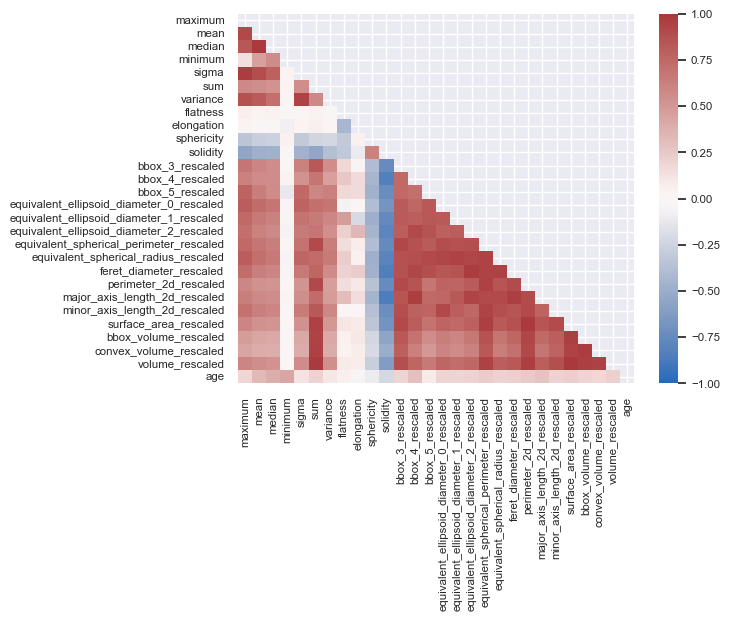

In [8]:
heatmap, corr_matrix = correlation_matrix(measurements_filtered, method="pearson")

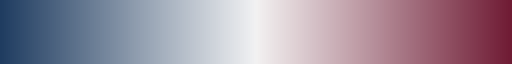

In [6]:
#color scheme for heatmap
gradient = sns.diverging_palette(
    h_neg = 250, 
    h_pos = 0, 
    l = 25, 
    as_cmap = True, 
    center = "light")

#show the gradient
gradient

In [9]:
import ipywidgets as widgets
from ipywidgets import interact

# Assuming correlation_matrix and feature_names_age_matrix are defined

# Function to create correlation matrix plot based on selected feature
def plot_correlation_matrix(selected_feature):
    # Retrieve the selected feature as a single column
    correlation_matrix_feature = corr_matrix[[selected_feature]]

    # Sort the values of the correlation matrix in descending order
    correlation_matrix_feature = correlation_matrix_feature.sort_values(
        by=selected_feature,
        ascending=False
    )

    # Drop the selected feature from the correlation matrix
    correlation_matrix_feature = correlation_matrix_feature.drop(
        labels=selected_feature,
        axis=0
    )

    # Plot the correlation matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix_feature.round(2),
                cmap=gradient,
                square=True,
                vmin=-1,
                vmax=1,
                center=0.00,
                annot=True
                )
    plt.title(f'Correlation Matrix for {selected_feature}')
    plt.show()

# Get a list of available features
available_features = list(corr_matrix.columns)

# Create an interactive widget to select the feature
feature_selector = widgets.Dropdown(
    options=available_features,
    value=available_features[0],
    description='Select Feature:'
)

# Use interact to make the plot interactive
interact(plot_correlation_matrix, selected_feature=feature_selector);

interactive(children=(Dropdown(description='Select Feature:', options=('maximum', 'mean', 'median', 'minimum',…

In [10]:
#function to update scatter plot based on user selection
def update_scatter_plot(feature1, feature2):
    plt.figure(figsize=(8, 6))
    plt.scatter(measurements[feature1], measurements[feature2], s=2)
    plt.title(f'Scatter Plot: {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True)
    plt.show()

# Get the list of features from the DataFrame columns
features = measurements.columns.tolist()

# Create interactive widgets
feature1_dropdown = widgets.Dropdown(options=features, description='X-Axis:')
feature2_dropdown = widgets.Dropdown(options=features, description='Y-Axis:')

# Use interact to link the widgets and the update function
interact(update_scatter_plot, feature1=feature1_dropdown, feature2=feature2_dropdown)

interactive(children=(Dropdown(description='X-Axis:', options=('label', 'age', 'biol_repl', 'image_id', 'maxim…

<function __main__.update_scatter_plot(feature1, feature2)>

(-1.0, 30.0)

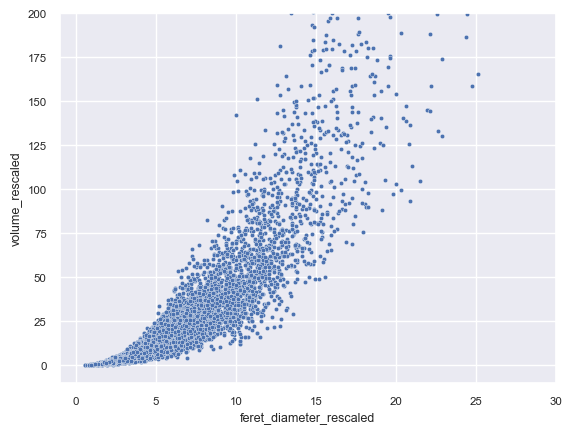

In [21]:
sns.scatterplot(data=measurements,
                x="feret_diameter_rescaled",
                y="volume_rescaled",
                s=10)

plt.ylim(-10, 200)
plt.xlim(-1, 30)

(-0.1, 5.0)

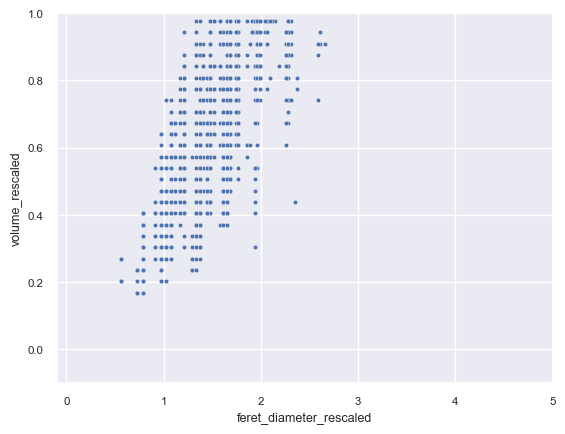

In [33]:
sns.scatterplot(data=measurements,
                x="feret_diameter_rescaled",
                y="volume_rescaled",
                s=10)

plt.ylim(-0.1, 1)
plt.xlim(-0.1, 5)

### Thresholds based on the 5- and 95 percentiles

- thresholds will be based on the 5 percentile

In [17]:
print("Number of OS in dataset before filter: ", len(measurements))

Number of OS in dataset befor filter:  16700


In [73]:
five_percentile = measurements["volume_rescaled"].quantile(0.05)
five_percentile

0.471775738

In [80]:
print("Number of OS in dataset smaller than 5 percentile: ", len(measurements[measurements["volume_rescaled"] <= five_percentile]))
print("Number of OS in dataset bigger than 5 percentile: ", len(measurements[measurements["volume_rescaled"] > five_percentile]))

Number of OS in dataset smaller than 5 percentile:  964
Number of OS in dataset bigger than 5 percentile:  15736


In [87]:
filtered_measurements = measurements[measurements["volume_rescaled"] > five_percentile]
filtered_measurements

,label,age,biol_repl,image_id,maximum,mean,median,minimum,sigma,sum,...,equivalent_spherical_perimeter_rescaled,equivalent_spherical_radius_rescaled,feret_diameter_rescaled,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled
0,1,8,1,0,803.0,314.092437,282.884766,186.0,99.098496,261639.0,...,138.287624,1.885333,8.107236,18.460443,8.872033,2.037236,85.604886,116.461211,51.389857,28.070656
1,2,8,1,0,1845.0,620.114058,466.576172,174.0,407.194822,467566.0,...,129.399980,1.823742,6.111447,8.976538,3.444867,2.044837,43.541779,42.257627,29.149001,25.408493
2,3,8,1,0,564.0,274.831858,253.494141,154.0,91.856545,62112.0,...,57.955182,1.220513,3.995289,6.273068,2.549953,1.312964,21.829812,14.018479,9.233325,7.615808
3,4,8,1,0,540.0,285.008439,268.189453,153.0,89.769054,67547.0,...,59.820799,1.240002,4.669557,6.273068,2.766553,1.117553,23.752687,16.175168,9.570308,7.986489
4,5,8,1,0,264.0,234.200000,238.798828,202.0,20.192821,5855.0,...,13.355085,0.585895,2.261000,2.777771,1.010003,0.745937,8.389508,2.426275,1.112043,0.842457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,173,24,28,83,312.0,243.290323,245.492188,179.0,26.596939,60336.0,...,61.657763,1.258897,5.297594,9.737588,4.460800,1.451807,40.056207,46.705798,12.805341,8.357170
16696,174,24,28,83,685.0,346.677288,326.101562,187.0,92.460071,424333.0,...,178.734172,2.143385,8.551879,30.066147,8.226779,5.176775,131.982553,226.856733,104.262438,41.246679
16697,175,24,28,83,609.0,337.340530,326.101562,188.0,81.507414,343750.0,...,158.174366,2.016343,8.478365,21.955740,9.303697,3.873424,102.052789,176.915902,74.136187,34.338534
16698,176,24,28,83,347.0,255.431818,252.820312,193.0,37.513655,11239.0,...,19.468019,0.707387,1.910894,4.002664,1.622372,0.810159,7.356350,3.032844,1.819706,1.482724


- threshold based on the 95 percentile

In [83]:
ninety_five_percentile = measurements["volume_rescaled"].quantile(0.95)
ninety_five_percentile

59.71501403734998

In [85]:
print("Number of OS in dataset smaller than 5 percentile: ", len(filtered_measurements[filtered_measurements["volume_rescaled"] < ninety_five_percentile]))
print("Number of OS in dataset bigger than 5 percentile: ", len(filtered_measurements[filtered_measurements["volume_rescaled"] >= ninety_five_percentile]))

Number of OS in dataset smaller than 5 percentile:  14901
Number of OS in dataset bigger than 5 percentile:  835


In [88]:
filtered_measurements = filtered_measurements[filtered_measurements["volume_rescaled"] < ninety_five_percentile]
filtered_measurements

,label,age,biol_repl,image_id,maximum,mean,median,minimum,sigma,sum,...,equivalent_spherical_perimeter_rescaled,equivalent_spherical_radius_rescaled,feret_diameter_rescaled,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled
0,1,8,1,0,803.0,314.092437,282.884766,186.0,99.098496,261639.0,...,138.287624,1.885333,8.107236,18.460443,8.872033,2.037236,85.604886,116.461211,51.389857,28.070656
1,2,8,1,0,1845.0,620.114058,466.576172,174.0,407.194822,467566.0,...,129.399980,1.823742,6.111447,8.976538,3.444867,2.044837,43.541779,42.257627,29.149001,25.408493
2,3,8,1,0,564.0,274.831858,253.494141,154.0,91.856545,62112.0,...,57.955182,1.220513,3.995289,6.273068,2.549953,1.312964,21.829812,14.018479,9.233325,7.615808
3,4,8,1,0,540.0,285.008439,268.189453,153.0,89.769054,67547.0,...,59.820799,1.240002,4.669557,6.273068,2.766553,1.117553,23.752687,16.175168,9.570308,7.986489
4,5,8,1,0,264.0,234.200000,238.798828,202.0,20.192821,5855.0,...,13.355085,0.585895,2.261000,2.777771,1.010003,0.745937,8.389508,2.426275,1.112043,0.842457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,173,24,28,83,312.0,243.290323,245.492188,179.0,26.596939,60336.0,...,61.657763,1.258897,5.297594,9.737588,4.460800,1.451807,40.056207,46.705798,12.805341,8.357170
16696,174,24,28,83,685.0,346.677288,326.101562,187.0,92.460071,424333.0,...,178.734172,2.143385,8.551879,30.066147,8.226779,5.176775,131.982553,226.856733,104.262438,41.246679
16697,175,24,28,83,609.0,337.340530,326.101562,188.0,81.507414,343750.0,...,158.174366,2.016343,8.478365,21.955740,9.303697,3.873424,102.052789,176.915902,74.136187,34.338534
16698,176,24,28,83,347.0,255.431818,252.820312,193.0,37.513655,11239.0,...,19.468019,0.707387,1.910894,4.002664,1.622372,0.810159,7.356350,3.032844,1.819706,1.482724


In [18]:
print("Number of OS in dataset with volume smaller then 200 µm^3: ", len(measurements[measurements["volume_rescaled"] < 200]))

Number of OS in dataset with volume smaller than 200 µm^3:  16578


In [51]:
print("Number of OS in dataset with volume smaller then 100 µm^3: ", len(measurements[measurements["volume_rescaled"] < 100]))

Number of OS in dataset with volume smaller then 100 µm^3:  16307


In [28]:
print("Number of OS in dataset with volume bigger then 1 µm^3: ", len(measurements[measurements["volume_rescaled"] > 1]))

Number of OS in dataset with volume bigger then 1 µm^3:  14232


In [39]:
print("Number of OS in dataset with volume smaller than 0.5: ", len(measurements[measurements["volume_rescaled"] < 0.5]))

Number of OS in dataset with volume smaller than 0.5:  964


In [35]:
print("Number of OS in dataset with volume smaller than 1: ", len(measurements[measurements["volume_rescaled"] < 1]))

Number of OS in dataset with volume smaller than 1:  2468


In [47]:
filtered_df = measurements[(measurements['volume_rescaled'] < 0.8) & (measurements['feret_diameter_rescaled'] > 1.5)]
filtered_df

,label,age,biol_repl,image_id,maximum,mean,median,minimum,sigma,sum,...,equivalent_spherical_perimeter_rescaled,equivalent_spherical_radius_rescaled,feret_diameter_rescaled,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled
30,34,8,1,0,235.0,199.000000,194.712891,180.0,16.124515,4577.0,...,12.632962,0.569835,1.739408,2.777771,1.010003,0.745937,6.344583,1.819706,0.909853,0.775060
77,85,8,1,0,370.0,299.166667,297.580078,235.0,42.286488,5385.0,...,10.728401,0.525126,1.646983,2.524088,1.000779,0.577800,4.618203,1.213138,0.741362,0.606569
96,107,8,1,0,345.0,271.217391,260.841797,224.0,37.098097,6238.0,...,12.632962,0.569835,1.678357,2.524088,1.000779,0.577800,3.595453,1.213138,0.842457,0.775060
107,118,8,1,0,298.0,242.000000,260.841797,192.0,38.341952,4840.0,...,11.509063,0.543897,1.646983,2.957153,1.196160,0.690603,6.719038,1.819706,0.876155,0.673965
152,48,8,1,1,283.0,235.904762,234.101562,187.0,26.491328,4954.0,...,11.889571,0.552814,1.646983,3.136534,1.409358,0.534568,5.012019,1.617517,0.876155,0.707664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16448,60,24,28,82,373.0,288.052632,291.251953,196.0,51.568157,5473.0,...,11.122158,0.534676,1.646983,2.524088,1.000779,0.577800,4.137563,1.213138,0.775060,0.640267
16510,134,24,28,82,290.0,238.947368,240.912109,183.0,27.226363,4540.0,...,11.122158,0.534676,1.646983,2.524088,1.000779,0.577800,3.981069,1.213138,0.775060,0.640267
16599,60,24,28,83,354.0,259.913043,230.835938,189.0,53.357212,5978.0,...,12.632962,0.569835,1.646983,2.777771,1.010003,0.745937,6.093064,1.819706,0.909853,0.775060
16640,106,24,28,83,371.0,293.000000,289.460938,233.0,46.801709,4688.0,...,9.918210,0.504909,1.646983,2.091023,0.646000,0.646000,2.534694,0.808758,0.606569,0.539172


In [52]:
cutoff_value = measurements['volume_rescaled'].quantile(0.95)

# Filter the DataFrame to keep only the rows below the cutoff value
filtered_df = measurements[measurements["volume_rescaled"] < cutoff_value]
filtered_df

,label,age,biol_repl,image_id,maximum,mean,median,minimum,sigma,sum,...,equivalent_spherical_perimeter_rescaled,equivalent_spherical_radius_rescaled,feret_diameter_rescaled,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled
0,1,8,1,0,803.0,314.092437,282.884766,186.0,99.098496,261639.0,...,138.287624,1.885333,8.107236,18.460443,8.872033,2.037236,85.604886,116.461211,51.389857,28.070656
1,2,8,1,0,1845.0,620.114058,466.576172,174.0,407.194822,467566.0,...,129.399980,1.823742,6.111447,8.976538,3.444867,2.044837,43.541779,42.257627,29.149001,25.408493
2,3,8,1,0,564.0,274.831858,253.494141,154.0,91.856545,62112.0,...,57.955182,1.220513,3.995289,6.273068,2.549953,1.312964,21.829812,14.018479,9.233325,7.615808
3,4,8,1,0,540.0,285.008439,268.189453,153.0,89.769054,67547.0,...,59.820799,1.240002,4.669557,6.273068,2.766553,1.117553,23.752687,16.175168,9.570308,7.986489
4,5,8,1,0,264.0,234.200000,238.798828,202.0,20.192821,5855.0,...,13.355085,0.585895,2.261000,2.777771,1.010003,0.745937,8.389508,2.426275,1.112043,0.842457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,173,24,28,83,312.0,243.290323,245.492188,179.0,26.596939,60336.0,...,61.657763,1.258897,5.297594,9.737588,4.460800,1.451807,40.056207,46.705798,12.805341,8.357170
16696,174,24,28,83,685.0,346.677288,326.101562,187.0,92.460071,424333.0,...,178.734172,2.143385,8.551879,30.066147,8.226779,5.176775,131.982553,226.856733,104.262438,41.246679
16697,175,24,28,83,609.0,337.340530,326.101562,188.0,81.507414,343750.0,...,158.174366,2.016343,8.478365,21.955740,9.303697,3.873424,102.052789,176.915902,74.136187,34.338534
16698,176,24,28,83,347.0,255.431818,252.820312,193.0,37.513655,11239.0,...,19.468019,0.707387,1.910894,4.002664,1.622372,0.810159,7.356350,3.032844,1.819706,1.482724


In [62]:
cutoff_value = measurements['volume_rescaled'].quantile(0.05)
cutoff_value

0.471775738

In [71]:
len(measurements[measurements["volume_rescaled"] < smaller_5_percent])

832

### Filter based on volume

- remove smallest and biggest 5 %

In [69]:
smaller_5_percent = measurements["volume_rescaled"].quantile(0.05)

filtered_measurements = measurements[measurements["volume_rescaled"] > smaller_5_percent]
filtered_measurements

,label,age,biol_repl,image_id,maximum,mean,median,minimum,sigma,sum,...,equivalent_spherical_perimeter_rescaled,equivalent_spherical_radius_rescaled,feret_diameter_rescaled,perimeter_2d_rescaled,major_axis_length_2d_rescaled,minor_axis_length_2d_rescaled,surface_area_rescaled,bbox_volume_rescaled,convex_volume_rescaled,volume_rescaled
0,1,8,1,0,803.0,314.092437,282.884766,186.0,99.098496,261639.0,...,138.287624,1.885333,8.107236,18.460443,8.872033,2.037236,85.604886,116.461211,51.389857,28.070656
1,2,8,1,0,1845.0,620.114058,466.576172,174.0,407.194822,467566.0,...,129.399980,1.823742,6.111447,8.976538,3.444867,2.044837,43.541779,42.257627,29.149001,25.408493
2,3,8,1,0,564.0,274.831858,253.494141,154.0,91.856545,62112.0,...,57.955182,1.220513,3.995289,6.273068,2.549953,1.312964,21.829812,14.018479,9.233325,7.615808
3,4,8,1,0,540.0,285.008439,268.189453,153.0,89.769054,67547.0,...,59.820799,1.240002,4.669557,6.273068,2.766553,1.117553,23.752687,16.175168,9.570308,7.986489
4,5,8,1,0,264.0,234.200000,238.798828,202.0,20.192821,5855.0,...,13.355085,0.585895,2.261000,2.777771,1.010003,0.745937,8.389508,2.426275,1.112043,0.842457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,173,24,28,83,312.0,243.290323,245.492188,179.0,26.596939,60336.0,...,61.657763,1.258897,5.297594,9.737588,4.460800,1.451807,40.056207,46.705798,12.805341,8.357170
16696,174,24,28,83,685.0,346.677288,326.101562,187.0,92.460071,424333.0,...,178.734172,2.143385,8.551879,30.066147,8.226779,5.176775,131.982553,226.856733,104.262438,41.246679
16697,175,24,28,83,609.0,337.340530,326.101562,188.0,81.507414,343750.0,...,158.174366,2.016343,8.478365,21.955740,9.303697,3.873424,102.052789,176.915902,74.136187,34.338534
16698,176,24,28,83,347.0,255.431818,252.820312,193.0,37.513655,11239.0,...,19.468019,0.707387,1.910894,4.002664,1.622372,0.810159,7.356350,3.032844,1.819706,1.482724
